<a href="https://colab.research.google.com/github/caalr11/FisicaComputacional1/blob/master/Actividad5/Actividad5_CarlosA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

%matplotlib inline


In [ ]:
url ="https://raw.githubusercontent.com/caalr11/FisicaComputacional1/master/Actividad1/data%20guaymas.txt"
my_col = ['Fecha', 'Precip', 'Evap', 'Tmax', 'Tmin']
df_dist = pd.read_csv(url, names=my_col, encoding='cp1251', sep='\s+', header=None, skiprows=19, skipfooter=1, engine='python')
df_ca0 = df_dist.copy()
str_Nulo = 'Nulo'
df_ca1 = df_ca0.replace(to_replace=str_Nulo, value='', regex=True)
col_list = ['Precip', 'Evap', 'Tmax', 'Tmin']
for col in col_list:
  df_ca1[col] = pd.to_numeric(df_ca1[col], errors='coerce')
  df_ca2 = df_ca1.copy()
  df_ca2['Fecha']=pd.to_datetime(df_ca2['Fecha'], dayfirst=True).copy()
df_ca2['Año'] = df_ca2['Fecha'].dt.year
df_ca2['Mes'] = df_ca2['Fecha'].dt.strftime('%b')
df_clima = df_ca2.copy()
df_clima.info()
print(df_clima.head())
print(df_clima.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17879 entries, 0 to 17878
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Fecha   17879 non-null  datetime64[ns]
 1   Precip  17847 non-null  float64       
 2   Evap    5731 non-null   float64       
 3   Tmax    17823 non-null  float64       
 4   Tmin    17828 non-null  float64       
 5   Año     17879 non-null  int64         
 6   Mes     17879 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 977.9+ KB
       Fecha  Precip  Evap  Tmax  Tmin   Año  Mes
0 1967-02-01     0.0   NaN  20.0   8.0  1967  Feb
1 1967-02-02     0.0   NaN  21.0   9.0  1967  Feb
2 1967-02-03     0.0   NaN  26.0   8.0  1967  Feb
3 1967-02-04     0.0   NaN  25.0   7.0  1967  Feb
4 1967-02-05     0.0   NaN  23.0   7.0  1967  Feb
           Fecha  Precip  Evap  Tmax  Tmin   Año  Mes
17874 2016-09-26     0.0   NaN  37.0  20.0  2016  Sep
17875

In [ ]:
df_clima_ts = df_clima.copy()
df_clima_ts = df_clima_ts.set_index('Fecha')

df_clima_ts.info()
print(df_clima_ts.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17879 entries, 1967-02-01 to 2016-09-30
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Precip  17847 non-null  float64
 1   Evap    5731 non-null   float64
 2   Tmax    17823 non-null  float64
 3   Tmin    17828 non-null  float64
 4   Año     17879 non-null  int64  
 5   Mes     17879 non-null  object 
dtypes: float64(4), int64(1), object(1)
memory usage: 977.8+ KB
            Precip  Evap  Tmax  Tmin   Año  Mes
Fecha                                          
1967-02-01     0.0   NaN  20.0   8.0  1967  Feb
1967-02-02     0.0   NaN  21.0   9.0  1967  Feb
1967-02-03     0.0   NaN  26.0   8.0  1967  Feb
1967-02-04     0.0   NaN  25.0   7.0  1967  Feb
1967-02-05     0.0   NaN  23.0   7.0  1967  Feb


In [ ]:
df_67 = df_clima_ts[(df_clima_ts['Año'] >= 1967) & (df_clima_ts['Año'] < 1990)]
df_90 = df_clima_ts[(df_clima_ts['Año'] >= 1990) & (df_clima_ts['Año'] < 2016)]

In [ ]:
df_90.head()

,Precip,Evap,Tmax,Tmin,Año,Mes
Fecha,,,,,,
1990-01-01,0.0,1.8,25.0,7.5,1990,Jan
1990-01-02,0.0,2.5,24.0,8.0,1990,Jan
1990-01-03,0.0,3.3,24.0,8.5,1990,Jan
1990-01-04,0.0,2.0,20.0,8.5,1990,Jan
1990-01-05,0.0,2.3,20.0,5.0,1990,Jan


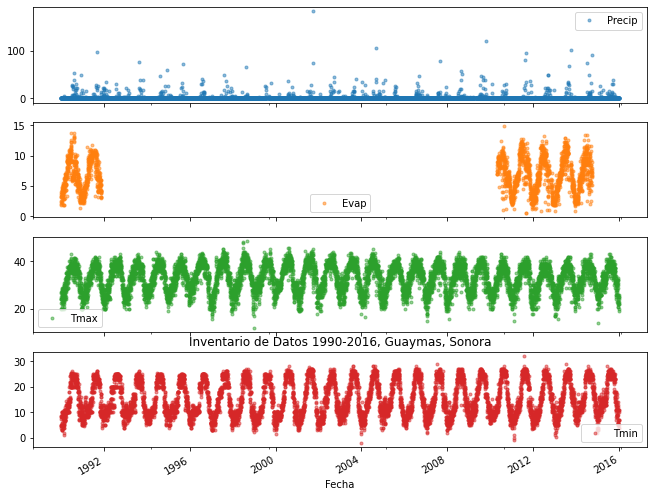

In [ ]:
col_plot = ['Precip', 'Evap', 'Tmax', 'Tmin']
ax_ylabels = ['Precip (mm)', 'Evap (mm)', 'Tmax ºC', 'Tmin ºC']
axes = df_90[col_plot].plot(marker='.', alpha=0.5, linestyle='None', 
                                  figsize=(11, 9), subplots=True)
plt.title('Inventario de Datos 1990-2016, Guaymas, Sonora');

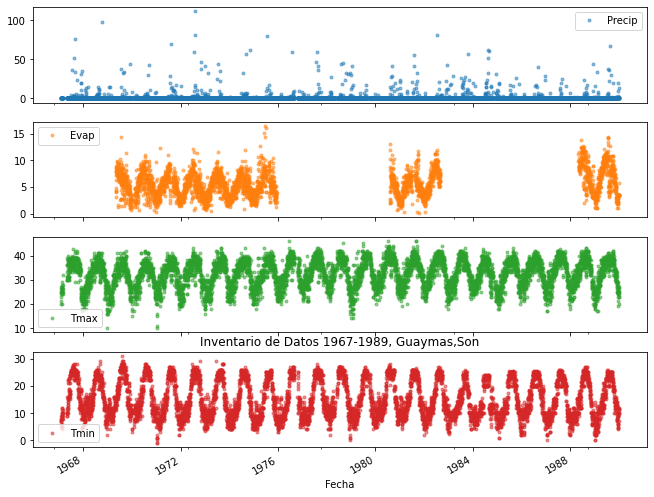

In [ ]:
col_plot = ['Precip', 'Evap', 'Tmax', 'Tmin']
ax_ylabels = ['Precip (mm)', 'Evap (mm)', 'Tmax ºC', 'Tmin ºC']
axes = df_67[col_plot].plot(marker='.', alpha=0.5, linestyle='None', 
                                  figsize=(11, 9), subplots=True)
plt.title('Inventario de Datos 1967-1989, Guaymas,Son');

Variación en Precipitación promedio 90-67 : 0.05191386603909387


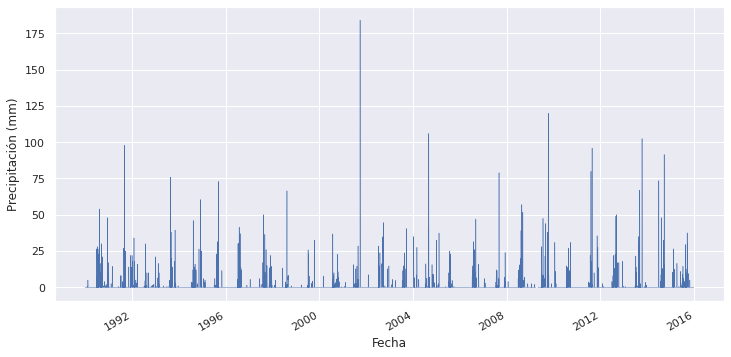

In [ ]:
# Precipitación de los últimos 30 años (1990-hasta 2016)
sns.set(rc={'figure.figsize':(12, 6)})
# Calculamos algunos promedios de cada época de 30 años
Precip_ave_90 = df_90.Precip.mean()
Precip_ave_67 = df_67.Precip.mean()

# Graficamos la precipitación de la epoca 90 a la actualidad
df_90['Precip'].plot(linewidth=0.5);
plt.ylabel('Precipitación (mm)');

print('Variación en Precipitación promedio 90-67 :', Precip_ave_90-Precip_ave_67)

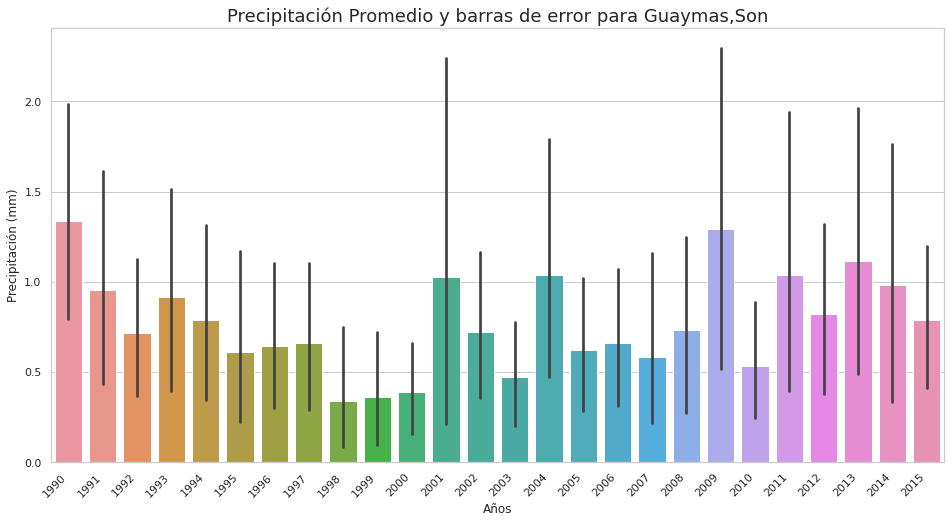

In [ ]:
# Precipitación últimos 30 años agrupada por Año
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

g =sns.barplot(x='Año', y='Precip', data=df_90);

# Rotamos 45º los Años en el eje x para mejor lectura
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.xlabel('Años')
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación Promedio y barras de error para Guaymas,Son', fontsize=18)
plt.show()

Variación ºC Tmax promedio 90s-67s : 0.42687913029616453


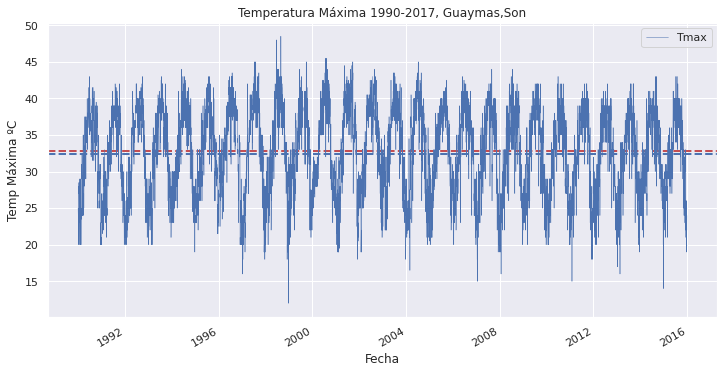

In [ ]:
# Tmax de los últimos 30 años (1990-hasta 2016)
sns.set(rc={'figure.figsize':(12, 6)})

Tmax_ave_90 = df_90.Tmax.mean()
Tmax_ave_67 = df_67.Tmax.mean()

# líneas promedios rojo 1990-2017, azul 1967-1989
plt.axhline(Tmax_ave_90, color = 'r', linestyle='--', linewidth=2);
plt.axhline(Tmax_ave_67, color = 'b', linestyle='--', linewidth=2);

df_90['Tmax'].plot(linewidth=0.5);
plt.ylabel('Temp Máxima ºC');
plt.title('Temperatura Máxima 1990-2017, Guaymas,Son')
plt.legend();

# Diferencia de temperaturas
print('Variación ºC Tmax promedio 90s-67s :', Tmax_ave_90-Tmax_ave_67)

Variación ºC Tmin promedio 90s-67s : 0.0960405366716568


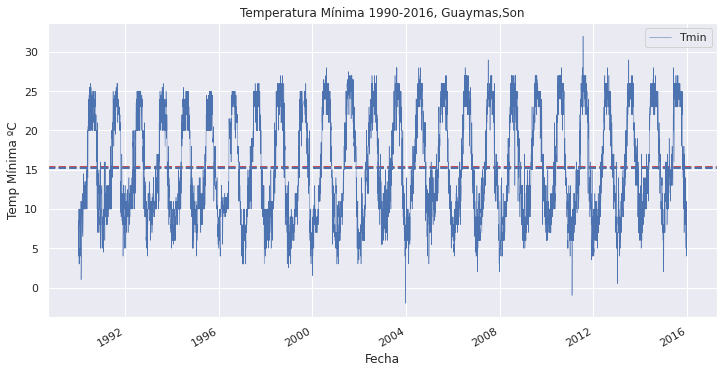

In [ ]:
sns.set(rc={'figure.figsize':(12, 6)})

Tmin_ave_90 = df_90.Tmin.mean()
Tmin_ave_67 = df_67.Tmin.mean()

plt.axhline(Tmin_ave_90, color = 'r', linestyle='--', linewidth=2);
plt.axhline(Tmin_ave_67, color = 'b', linestyle='--', linewidth=2);

df_90['Tmin'].plot(linewidth=0.5);
plt.ylabel('Temp Mínima ºC');
plt.title('Temperatura Mínima 1990-2016, Guaymas,Son')
plt.legend();
print('Variación ºC Tmin promedio 90s-67s :', Tmin_ave_90-Tmin_ave_67)

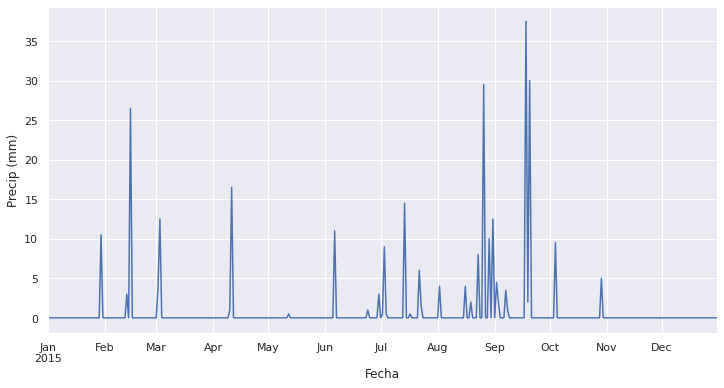

In [ ]:
ax = df_90.loc['2015', 'Precip'].plot()
ax.set_ylabel('Precip (mm)');

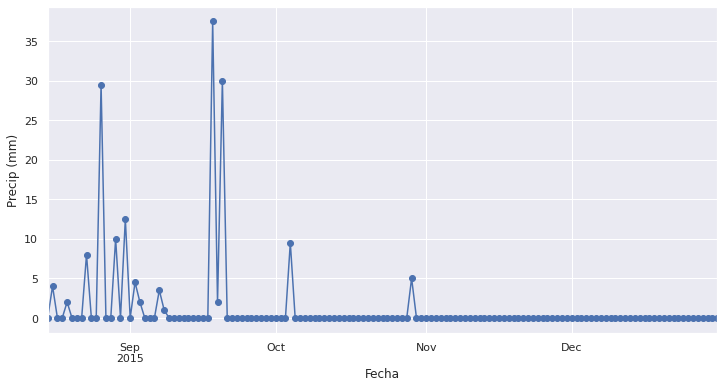

In [ ]:
ax = df_90.loc['2015-08-15':'2017-09-15', 'Precip'].plot(marker='o', linestyle='-')
ax.set_ylabel('Precip (mm)');


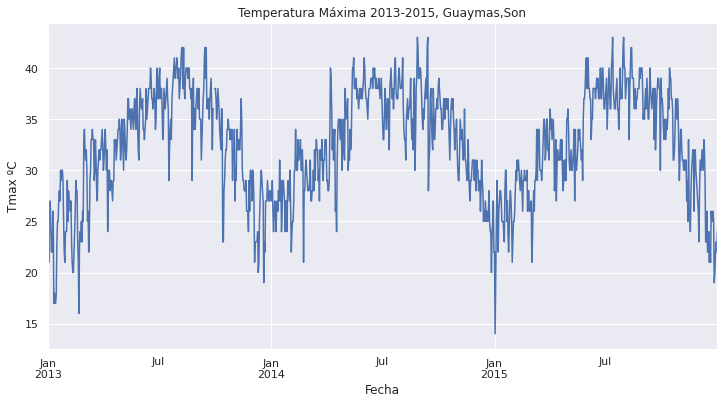

In [ ]:
sns.set(rc={'figure.figsize':(12, 6)})

ax = df_90.loc['2013':'2015', 'Tmax'].plot()
ax.set_ylabel('Tmax ºC');
ax.set_title('Temperatura Máxima 2013-2015, Guaymas,Son');

In [ ]:
data_cols = ['Evap', 'Tmax', 'Tmin']
df_90_7d = df_90[data_cols].rolling(7, center=True).mean()
df_90_30d = df_90[data_cols].rolling(30, center=True).mean()
df_90_365d = df_90[data_cols].rolling(365, center=True).mean()

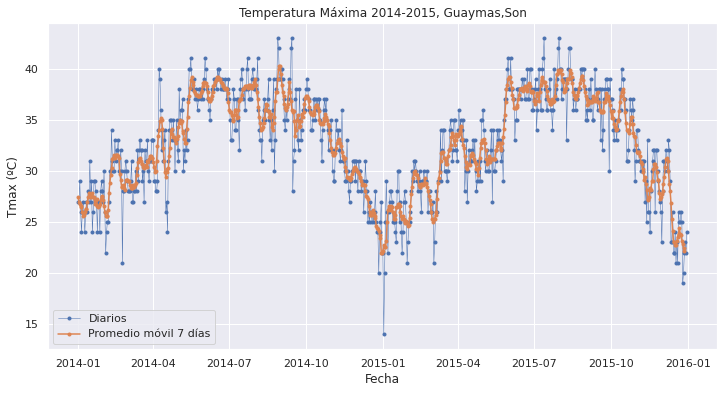

In [ ]:
start, end = '2014-01', '2015-12'
sns.set(rc={'figure.figsize':(12, 6)})
fig, ax = plt.subplots()
ax.plot(df_90.loc[start:end, 'Tmax'],
marker='.', linestyle='-', linewidth=0.5, label='Diarios')
ax.plot(df_90_7d.loc[start:end, 'Tmax'], marker='.', linestyle='-', label='Promedio móvil 7 días')

ax.set_xlabel('Fecha')
ax.set_ylabel('Tmax (ºC)')
ax.set_title('Temperatura Máxima 2014-2015, Guaymas,Son')
ax.legend();

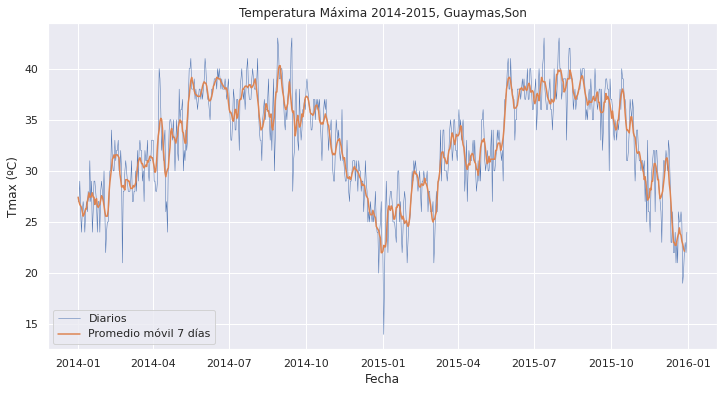

In [ ]:
# Misma gráfica anterior pero sin marcadores '.'
start, end = '2014-01', '2015-12'
sns.set(rc={'figure.figsize':(12, 6)})
fig, ax = plt.subplots()
ax.plot(df_90.loc[start:end, 'Tmax'],
linestyle='-', linewidth=0.5, label='Diarios')
ax.plot(df_90_7d.loc[start:end, 'Tmax'], linestyle='-', label='Promedio móvil 7 días')

ax.set_xlabel('Fecha')
ax.set_ylabel('Tmax (ºC)')
ax.set_title('Temperatura Máxima 2014-2015, Guaymas,Son')
ax.legend();

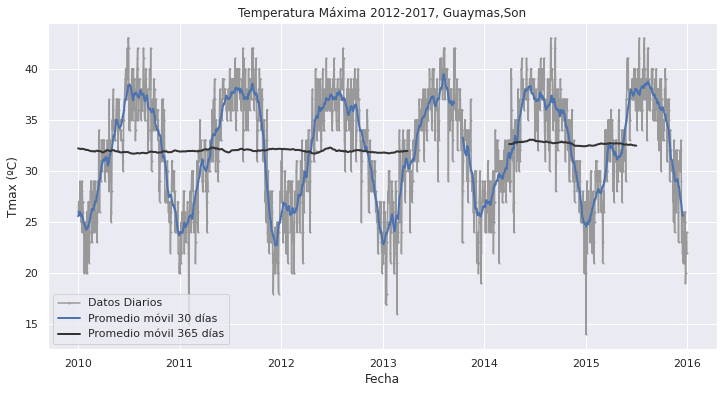

In [ ]:
# Tmax año con año
# Fechas de inicio y fin, para filtrar la información
start, end = '2010-01', '2015-12'
# promedio móvil de 30 y 365 días 
sns.set(rc={'figure.figsize':(12, 6)})

fig, ax = plt.subplots()
ax.plot(df_90.loc[start:end, 'Tmax'],
marker='.', markersize=2, linestyle='-', color='0.6',label='Datos Diarios')
ax.plot(df_90_30d.loc[start:end, 'Tmax'], linestyle='-', linewidth=2, label='Promedio móvil 30 días')
ax.plot(df_90_365d.loc[start:end, 'Tmax'], linestyle='-', color='0.2', linewidth=2, label='Promedio móvil 365 días')

ax.set_xlabel('Fecha')
ax.set_ylabel('Tmax (ºC)')
ax.set_title('Temperatura Máxima 2012-2017, Guaymas,Son')
ax.legend();

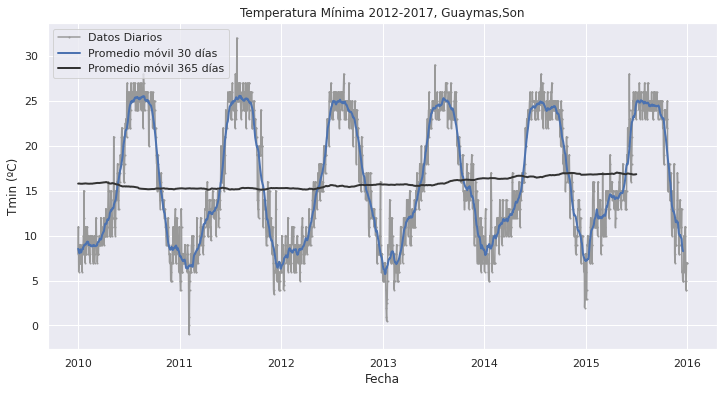

In [ ]:
# año con año para Tmin
start, end = '2010-01', '2015-12'
sns.set(rc={'figure.figsize':(12, 6)})
fig, ax = plt.subplots()
ax.plot(df_90.loc[start:end, 'Tmin'],
marker='.', markersize=2, linestyle='-', color='0.6',label='Datos Diarios')
ax.plot(df_90_30d.loc[start:end, 'Tmin'], linestyle='-', linewidth=2, label='Promedio móvil 30 días')
ax.plot(df_90_365d.loc[start:end, 'Tmin'], linestyle='-', color='0.2', linewidth=2, label='Promedio móvil 365 días')

ax.set_xlabel('Fecha')
ax.set_ylabel('Tmin (ºC)')
ax.set_title('Temperatura Mínima 2012-2017, Guaymas,Son')
ax.legend();

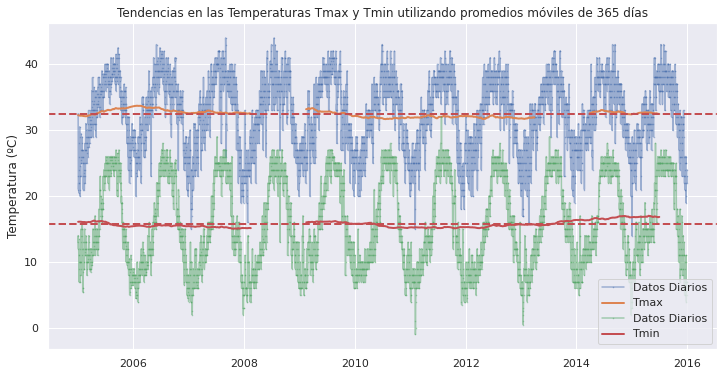

In [ ]:
sns.set(rc={'figure.figsize':(12, 6)})

start, end = '2005-01', '2015-12'

fig, ax = plt.subplots()
for nm in ['Tmax', 'Tmin']:
    ax.plot(df_90.loc[start:end, nm], marker='.', markersize=1, linestyle='-', alpha=0.5, label='Datos Diarios')
    ax.plot(df_90_365d.loc[start:end, nm], linewidth=2, label=nm)
    plt.axhline(df_90.loc[start:end, nm].mean(), color = 'r', linestyle='--', linewidth=2);
    ax.legend()
    ax.set_ylabel('Temperatura (ºC)')
    ax.set_title('Tendencias en las Temperaturas Tmax y Tmin utilizando promedios móviles de 365 días');

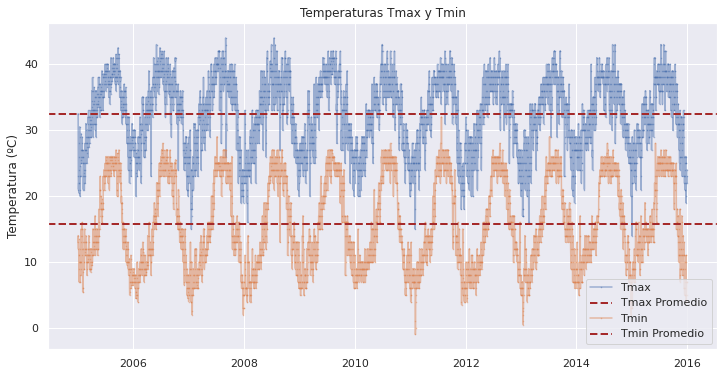

In [ ]:
#Graficas de Temperaturas Tmax, Tmin y Promedios  
sns.set(rc={'figure.figsize':(12, 6)})
start, end = '2005-01', '2017-12'

fig, ax = plt.subplots()
for nm in ['Tmax', 'Tmin']:
    ax.plot(df_90.loc[start:end, nm], marker='.', markersize=1, linestyle='-', 
            alpha=0.5, label=nm)
    plt.axhline(df_90.loc[start:end, nm].mean(), color='brown', linestyle='--', 
                linewidth=2, label=nm + ' Promedio');
    
    ax.legend()
    ax.set_ylabel('Temperatura (ºC)')
    ax.set_title('Temperaturas Tmax y Tmin');

In [ ]:

df_90_365d.info()
print(df_90_365d.head(185))
print(df_90_365d.tail(185))

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9465 entries, 1990-01-01 to 2015-12-31
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Evap    182 non-null    float64
 1   Tmax    8371 non-null   float64
 2   Tmin    8736 non-null   float64
dtypes: float64(3)
memory usage: 615.8 KB
                Evap       Tmax       Tmin
Fecha                                     
1990-01-01       NaN        NaN        NaN
1990-01-02       NaN        NaN        NaN
1990-01-03       NaN        NaN        NaN
1990-01-04       NaN        NaN        NaN
1990-01-05       NaN        NaN        NaN
...              ...        ...        ...
1990-06-30       NaN        NaN        NaN
1990-07-01       NaN        NaN        NaN
1990-07-02  6.524658  32.326027  14.768493
1990-07-03  6.525479  32.323288  14.778082
1990-07-04  6.525479  32.328767  14.789041

[185 rows x 3 columns]
            Evap       Tmax       Tmin
Fecha                      

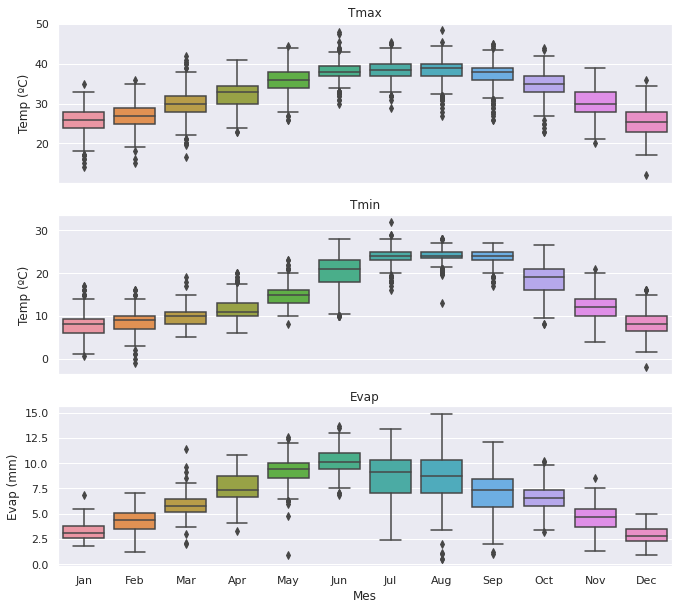

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True)
for name, ax in zip(['Tmax', 'Tmin', 'Evap'], axes):
  sns.boxplot(data=df_90, x='Mes', y=name, ax=ax)
  if name != 'Evap':
    ax.set_ylabel('Temp (ºC)')
  else: 
    ax.set_ylabel('Evap (mm)')
  ax.set_title(name)
  if ax != axes[-1]:
    ax.set_xlabel('')

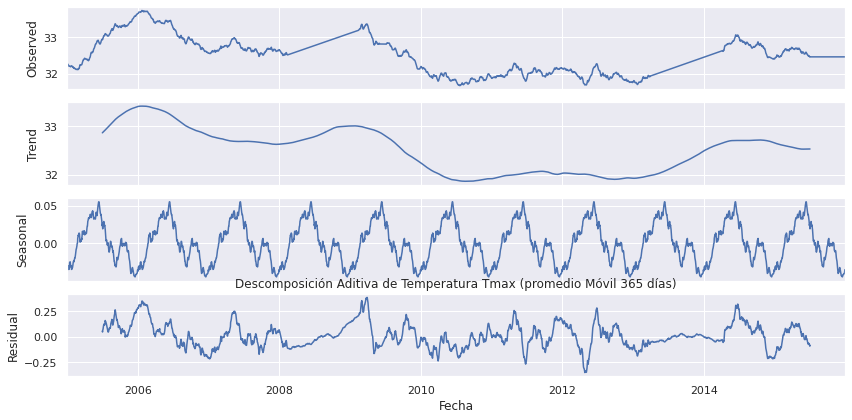

In [ ]:
sns.set(rc={'figure.figsize':(12, 6)})
start, end = '2005-01', '2017-06'
decompfreq = 365
resTmax = sm.tsa.seasonal_decompose(df_90_365d.loc[start:end, 'Tmax'].interpolate(),
                                    freq=decompfreq, model='additive')
resTmax.plot()
plt.title('Descomposición Aditiva de Temperatura Tmax (promedio Móvil 365 días)');

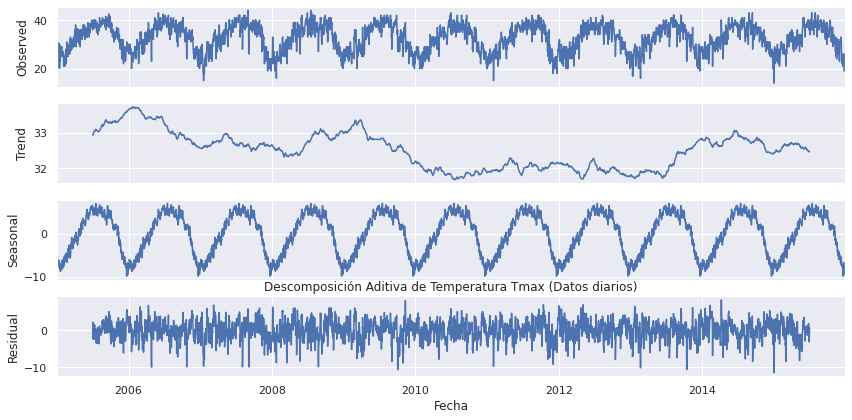

In [ ]:
sns.set(rc={'figure.figsize':(12, 6)})
start, end = '2005-01', '2017-06'

decompfreq = 365
resTmax = sm.tsa.seasonal_decompose(df_90.loc[start:end, 'Tmax'].interpolate(),
                                    freq=decompfreq, model='additive')
resTmax.plot()

plt.title('Descomposición Aditiva de Temperatura Tmax (Datos diarios)');

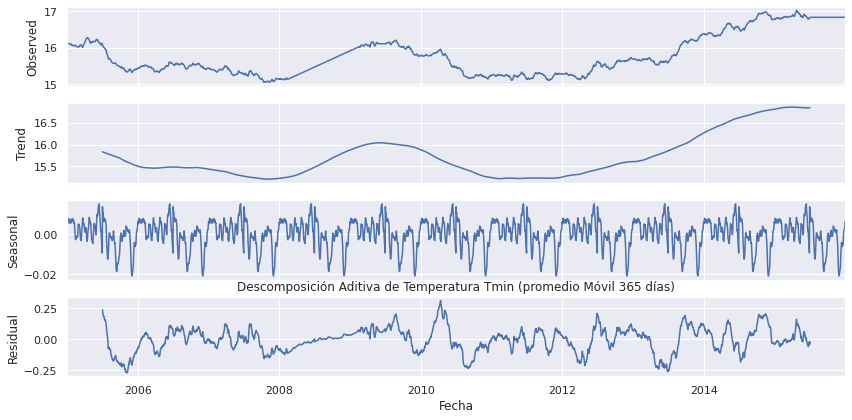

In [ ]:
sns.set(rc={'figure.figsize':(12, 6)})
start, end = '2005-01', '2017-06'

decompfreq = 365

resTmin = sm.tsa.seasonal_decompose(df_90_365d.loc[start:end, 'Tmin'].interpolate(),
                                    freq=decompfreq, model='additive')
resTmin.plot()

plt.title('Descomposición Aditiva de Temperatura Tmin (promedio Móvil 365 días)');

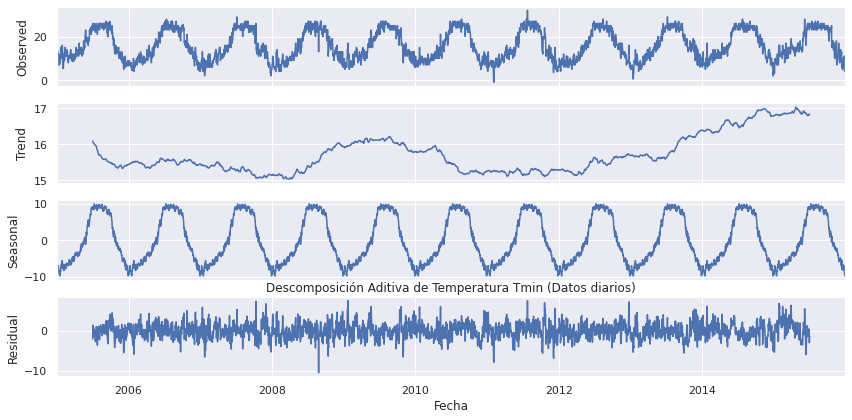

In [ ]:
sns.set(rc={'figure.figsize':(12, 6)})
start, end = '2005-01', '2017-06'

decompfreq = 365 

resTmin = sm.tsa.seasonal_decompose(df_90.loc[start:end, 'Tmin'].interpolate(),
                                    freq=decompfreq, model='additive')
resTmin.plot()

plt.title('Descomposición Aditiva de Temperatura Tmin (Datos diarios)');

In [ ]:
resTmax.trend.describe()

count    3653.000000
mean       32.508131
std         0.503788
min        31.679452
25%        32.016438
50%        32.572603
75%        32.831507
max        33.726027
Name: Tmax, dtype: float64

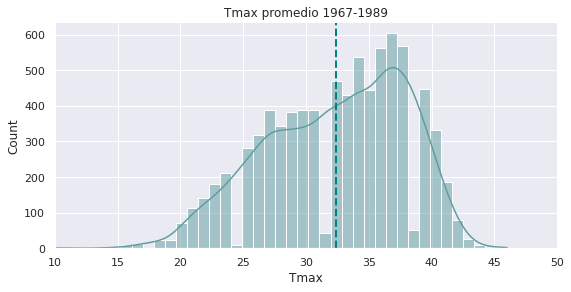

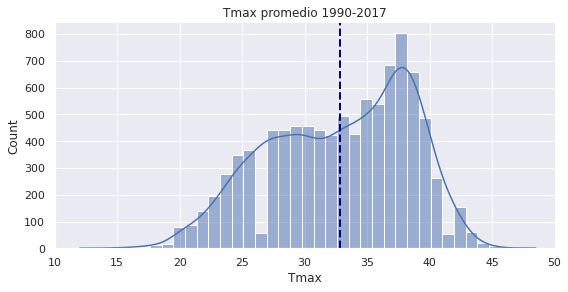

Tmax_promedio df_67 =  32.381004204798415 ºC
Tmax_promedio df_90 =  32.80788333509458 ºC


In [ ]:
g2 = sns.displot(df_67.Tmax, kde=True, color='cadetblue', height=4, aspect=2);
plt.axvline(df_67.Tmax.mean(), linestyle='--', linewidth=2, color='teal');

g3 = sns.displot(df_90.Tmax, kde=True, height=4, aspect=2);
plt.axvline(df_90.Tmax.mean(), linestyle='--', linewidth=2, color='navy');

g2.set(title='Tmax promedio 1967-1989');
g3.set(title='Tmax promedio 1990-2017');
g2.set(xlim=(10,50))
g3.set(xlim=(10,50))


plt.show();

print('Tmax_promedio df_67 = ', df_67.Tmax.mean(), 'ºC' )
print('Tmax_promedio df_90 = ', df_90.Tmax.mean(), 'ºC' )

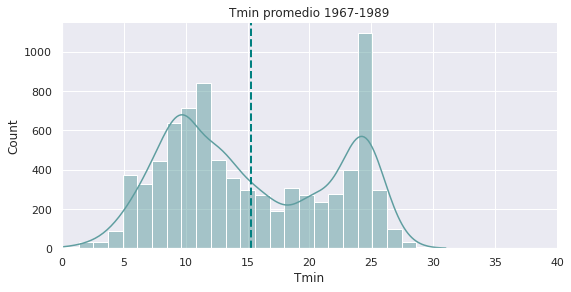

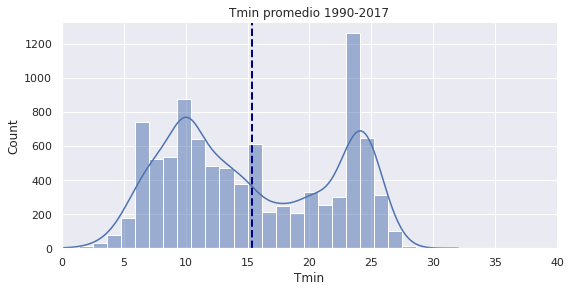

Tmin_promedio df_67 =  15.261260815822004 ºC
Tmin_promedio df_90 =  15.35730135249366 ºC
Tmin_sdev df_67 =  6.731305657050825 ºC
Tmin_sdev df_90 =  6.683260126421823 ºC


In [ ]:
g2 = sns.displot(df_67.Tmin, kde=True, color='cadetblue', height=4, aspect=2);
plt.axvline(df_67.Tmin.mean(), linestyle='--', linewidth=2, color='teal');

g3 = sns.displot(df_90.Tmin, kde=True, height=4, aspect=2);
plt.axvline(df_90.Tmin.mean(), linestyle='--', linewidth=2, color='navy');

g2.set(title='Tmin promedio 1967-1989');
g3.set(title='Tmin promedio 1990-2017');
g2.set(xlim=(0,40))
g3.set(xlim=(0,40))


plt.show();

print('Tmin_promedio df_67 = ', df_67.Tmin.mean(), 'ºC' )
print('Tmin_promedio df_90 = ', df_90.Tmin.mean(), 'ºC' )

print('Tmin_sdev df_67 = ', df_67.Tmin.std(), 'ºC' )
print('Tmin_sdev df_90 = ', df_90.Tmin.std(), 'ºC' )